# Project Break

El objetivo es: predecir la popularidad (popularity) de una canción en Spotify en base a sus características musicales.

In [1]:
# Paquetes de visualización y análisis de datos
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Gestión de advertencias para evitar mensajes innecesarios
import warnings
warnings.filterwarnings('ignore')

# Funciones de scikit-learn para métricas y división de datos
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Módulos para manejo de archivos y procesamiento de imágenes
import os
import glob
from PIL import Image

# Deep Learning: TensorFlow y Keras para construir y entrenar la red neuronal
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


## Base de Datos

In [2]:
# Ruta del archivo
file_path = r"C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\data\tracks.csv"

# Cargar el dataset
df_tracks = pd.read_csv(file_path)

# Confirmación
print(" Dataset cargado correctamente.")

 Dataset cargado correctamente.


In [3]:
# Mostrar las primeras filas
print(" Primeras 50 filas del dataset:\n")
print(df_tracks.head(50))

# Información del dataset
print("\nInformación general del dataset:\n")
print(df_tracks.info())


 Primeras 50 filas del dataset:

                        id                                             name  \
0   35iwgR4jXetI318WEWsa1Q                                            Carve   
1   021ht4sdgPcrDgSk7JTbKY              Capítulo 2.16 - Banquero Anarquista   
2   07A5yehtSnoedViJAZkNnc               Vivo para Quererte - Remasterizado   
3   08FmqUhxtyLTn6pAh6bk45                    El Prisionero - Remasterizado   
4   08y9GfoqCWfOGsKdwojr5e                              Lady of the Evening   
5   0BRXJHRNGQ3W4v9frnSfhu                                        Ave Maria   
6   0Dd9ImXtAtGwsmsAD69KZT                                   La Butte Rouge   
7   0IA0Hju8CAgYfV1hwhidBH                                          La Java   
8   0IgI1UCz84pYeVetnl1lGP                               Old Fashioned Girl   
9   0JV4iqw2lSKJaHBQZ0e5zK                    Martín Fierro - Remasterizado   
10  0OYGe21oScKJfanLyM7daU               Capítulo 2.8 - Banquero Anarquista   
11  0PE42H6tslQuyMM

In [4]:
# Ver cantidad de valores nulos por columna
print("\n Valores nulos en cada columna:\n")
print(df_tracks.isnull().sum())

# Ver estadísticas descriptivas de las columnas numéricas
print("\n Resumen estadístico de las columnas numéricas:\n")
print(df_tracks.describe())


 Valores nulos en cada columna:

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

 Resumen estadístico de las columnas numéricas:

          popularity   duration_ms      explicit   danceability  \
count  199999.000000  1.999990e+05  199999.00000  199999.000000   
mean       28.412787  2.304684e+05       0.04084       0.552868   
std        21.763931  1.345777e+05       0.19792       0.171302   
min         0.000000  3.344000e+03       0.00000       0.000000   
25%         7.000000  1.708065e+05       0.00000       0.436000   
50%        29.000000  2.091870e+05       0.00000       0.5660

- La distribución de la popularidad para ver cómo están distribuidas las canciones en función de su éxito.

Imagen guardada en: C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\distribucion_popularity.png


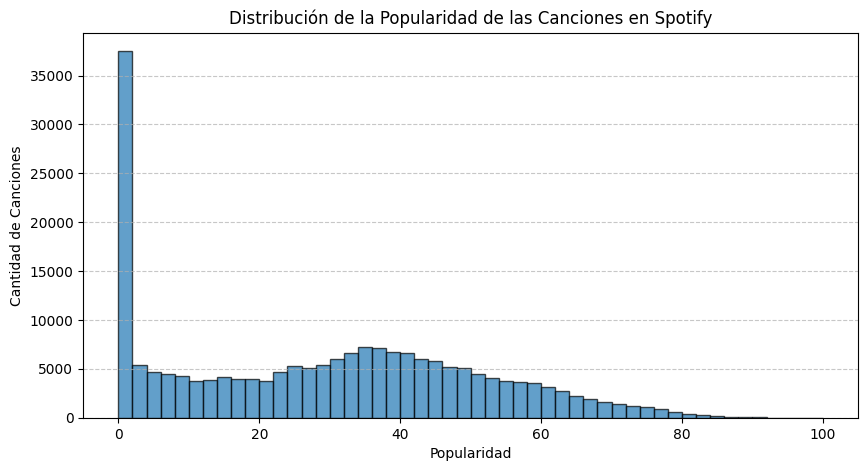

In [5]:
# Histograma de la popularidad
plt.figure(figsize=(10,5))
plt.hist(df_tracks['popularity'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel("Popularidad")
plt.ylabel("Cantidad de Canciones")
plt.title("Distribución de la Popularidad de las Canciones en Spotify")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Guardar imagen
img_path = r"C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\distribucion_popularity.png"
plt.savefig(img_path, dpi=300)

# Confirmación
print(f"Imagen guardada en: {img_path}")

# Mostrar
plt.show()

Puntos clave que se pueden observar en la popularidad:
- La mayoría de las canciones tienen baja popularidad (cerca de 0).
- Hay menos canciones con valores altos de popularidad (80-100), lo que indica un posible sesgo en la distribución.
- Es posible que haya muchas canciones antiguas o poco reproducidas que afecten la distribución.

Correlación de la popularidad con otras variables:

popularity          1.000000
energy              0.348068
loudness            0.324857
explicit            0.213121
danceability        0.159030
time_signature      0.094633
tempo               0.082183
duration_ms         0.057028
valence             0.034274
key                 0.013306
mode               -0.027511
liveness           -0.054052
speechiness        -0.109163
instrumentalness   -0.300735
acousticness       -0.457626
Name: popularity, dtype: float64
 Imagen guardada en: C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\correlacion_popularity.png


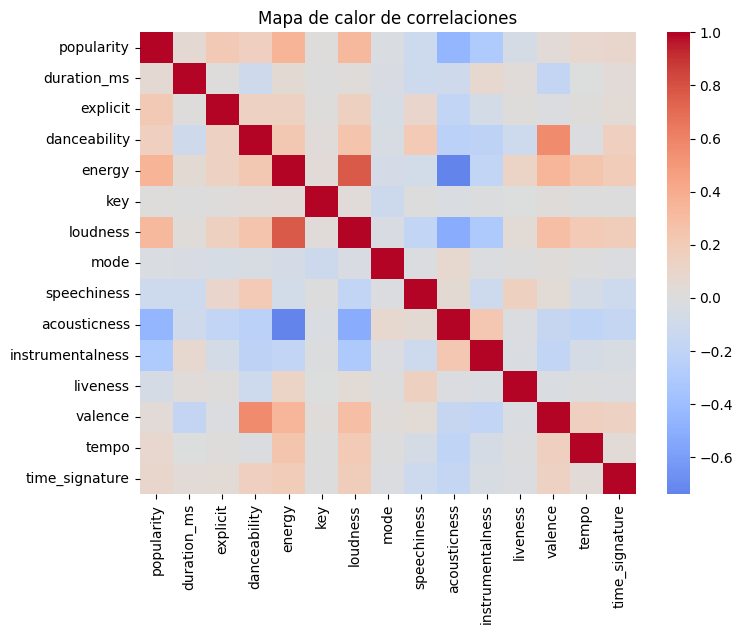

In [6]:
numeric_columns = df_tracks.select_dtypes(include=['number'])

# Correlación de la popularidad con otras variables
correlation_matrix = numeric_columns.corr()
popularity_correlation = correlation_matrix["popularity"].sort_values(ascending=False)

# Mostrar 
print("Correlación de la popularidad con otras variables:\n")
print(popularity_correlation)

# Heatmap para visualizar las correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Mapa de calor de correlaciones")

# Guardar  imagen 
img_path = r"C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\correlacion_popularity.png"
plt.savefig(img_path, dpi=300)

print(f" Imagen guardada en: {img_path}")

# Mostrar
plt.show()

Imagen guardada en: C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\correlacion_popularity_barra.png


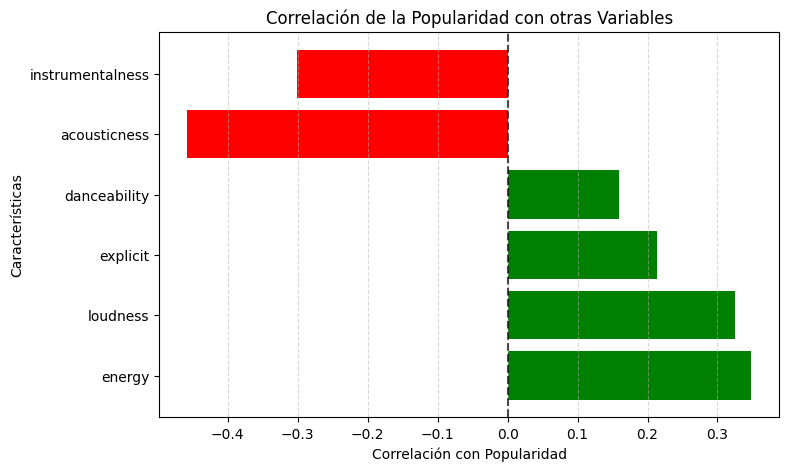

In [7]:
# Variables más correlacionadas con la popularidad
top_correlated_features = ["energy", "loudness", "explicit", "danceability", "acousticness", "instrumentalness"]
correlation_values = popularity_correlation[top_correlated_features]

# Gráfico de barras
plt.figure(figsize=(8,5))
plt.barh(correlation_values.index, correlation_values.values, color=['green' if x > 0 else 'red' for x in correlation_values.values])
plt.xlabel("Correlación con Popularidad")
plt.ylabel("Características")
plt.title("Correlación de la Popularidad con otras Variables")
plt.axvline(x=0, color="black", linestyle="--", alpha=0.7)
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Guardar imagen
img_path = r"C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\correlacion_popularity_barra.png"
plt.savefig(img_path, dpi=300)

print(f"Imagen guardada en: {img_path}")

# Mostrar 
plt.show()

- Las variables más influyentes en la popularidad son energy, loudness, explicit y danceability (positiva).
- Las variables negativamente relacionadas son acousticness e instrumentalness, lo que se indicaria como que las canciones más acústicas o instrumentales son menos populares.

Cambiamos la variable Realese_date a datetime para mejor manejo en grafica

In [8]:
# Función para extraer solo el año
def extract_year(date):
    date = str(date)  # Convertir a string para manejar distintos formatos
    if "-" in date:  # Formato YYYY-MM o YYYY-MM-DD
        return date[:4]  # Extraer solo los primeros 4 caracteres (el año)
    elif "/" in date:  # Formato DD/MM/YYYY o MM/DD/YYYY
        return date[-4:]  # Extraer los últimos 4 caracteres (el año)
    else:
        return date  # Si ya es solo el año, dejarlo igual

# Aplicar la función a la columna `release_date`
df_tracks["release_year"] = df_tracks["release_date"].apply(extract_year)

# Mostrar
print("Transformación completada. `release_year` ahora solo contiene años.")
print(df_tracks[["release_date", "release_year"]].sample(20, random_state=42))

print(df_tracks.info())

Transformación completada. `release_year` ahora solo contiene años.
       release_date release_year
134252         1933         1933
124140   01/01/1950         1950
62810    02/05/1989         1989
65425    01/01/1991         1991
30074    15/06/1956         1956
23677          1950         1950
134857         1936         1936
125997         1965         1965
84755    04/04/2011         2011
4082           1928         1928
143498      1974-11         1974
97334    01/01/1963         1963
144940   04/11/1978         1978
84659    04/11/2011         2011
160577         1963         1963
110851   01/01/2004         2004
174531   11/06/2012         2012
150546         1992         1992
9447           1934         1934
150046         1990         1990
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                199999 no

Imagen guardada en: C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\numero_canciones_por_anio.png


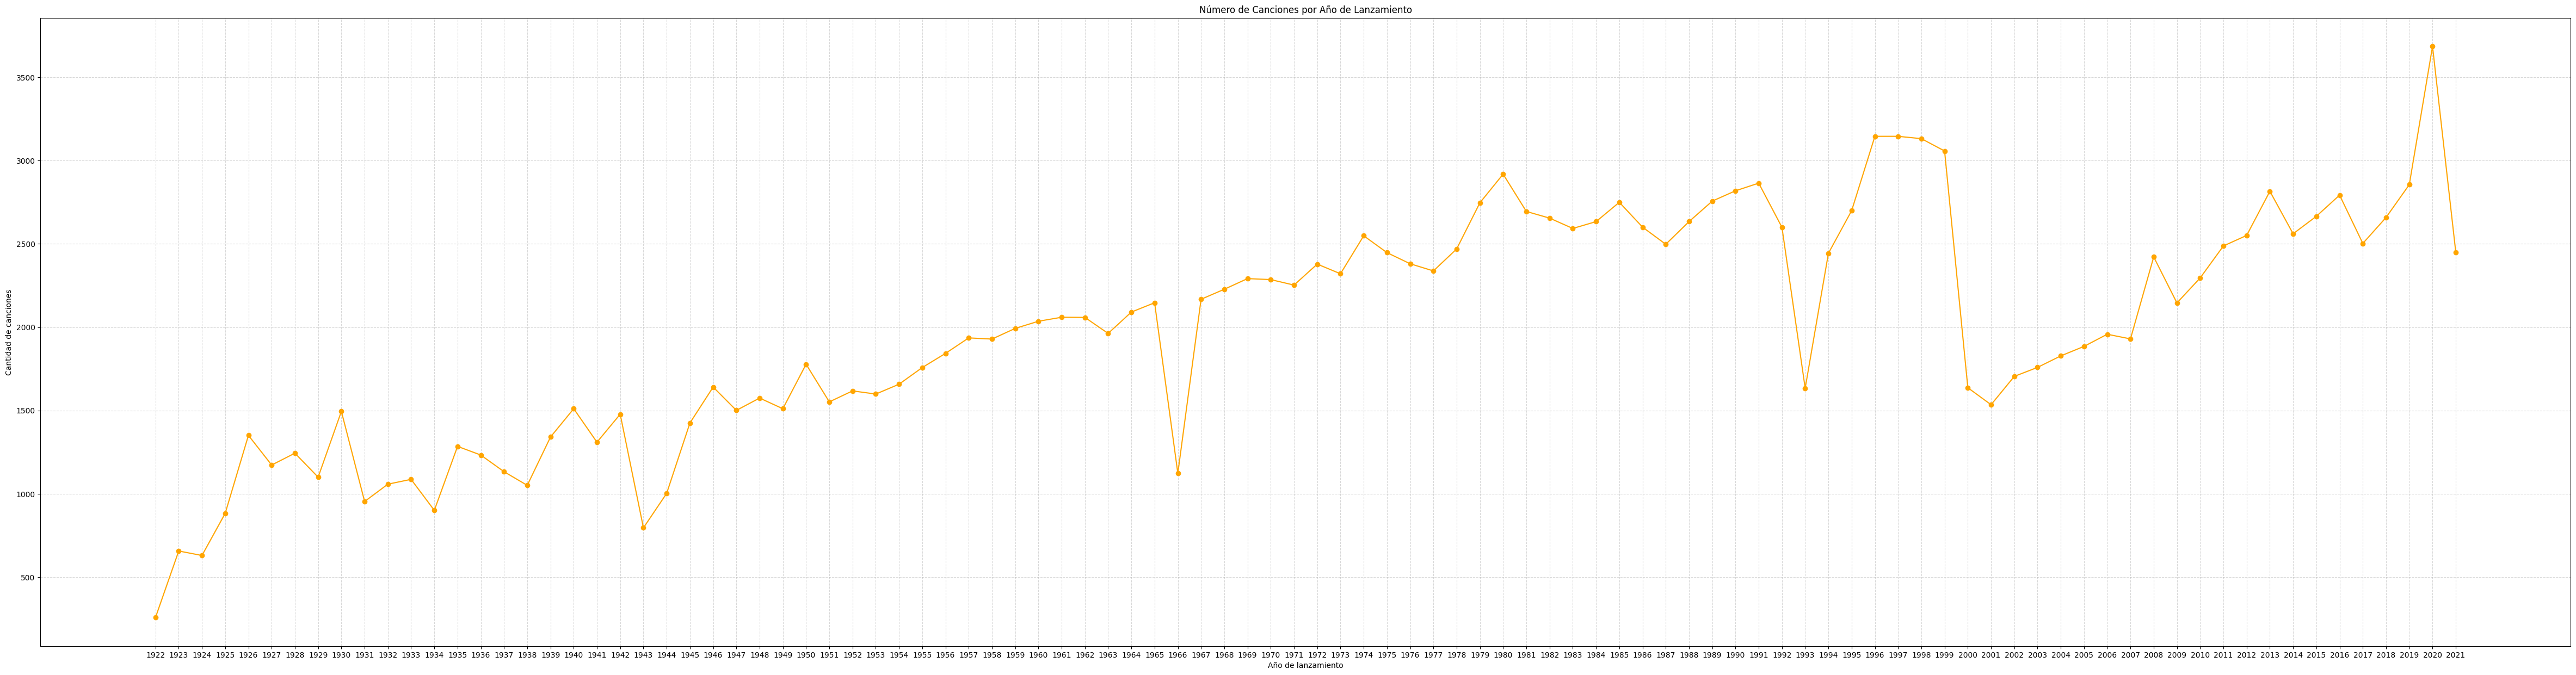

In [34]:
# Cantidad de canciones por año
songs_per_year = df_tracks["release_year"].value_counts().sort_index()

# Gráfico de línea
plt.figure(figsize=(60,15))
plt.plot(songs_per_year.index, songs_per_year.values, marker='o', linestyle='-', color='orange')
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad de canciones")
plt.title("Número de Canciones por Año de Lanzamiento")
plt.grid(True, linestyle="--", alpha=0.5)

# Guardar imagen 
img_path = r"C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\numero_canciones_por_anio.png"
plt.savefig(img_path, dpi=300)

print(f"Imagen guardada en: {img_path}")

# Mostrar
plt.show()

Puntos clave del gráfico de la Cantidad de Canciones por Año:
- Hay pocas canciones en los años más antiguos (antes de 1950).
- El número de canciones crece significativamente en los últimos años, por lo cual hay más datos recientes en la base.
- Esto sugiere que el dataset podria estar sesgado hacia canciones modernas.

Imagen guardada en: C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\popularidad_promedio_por_anio.png


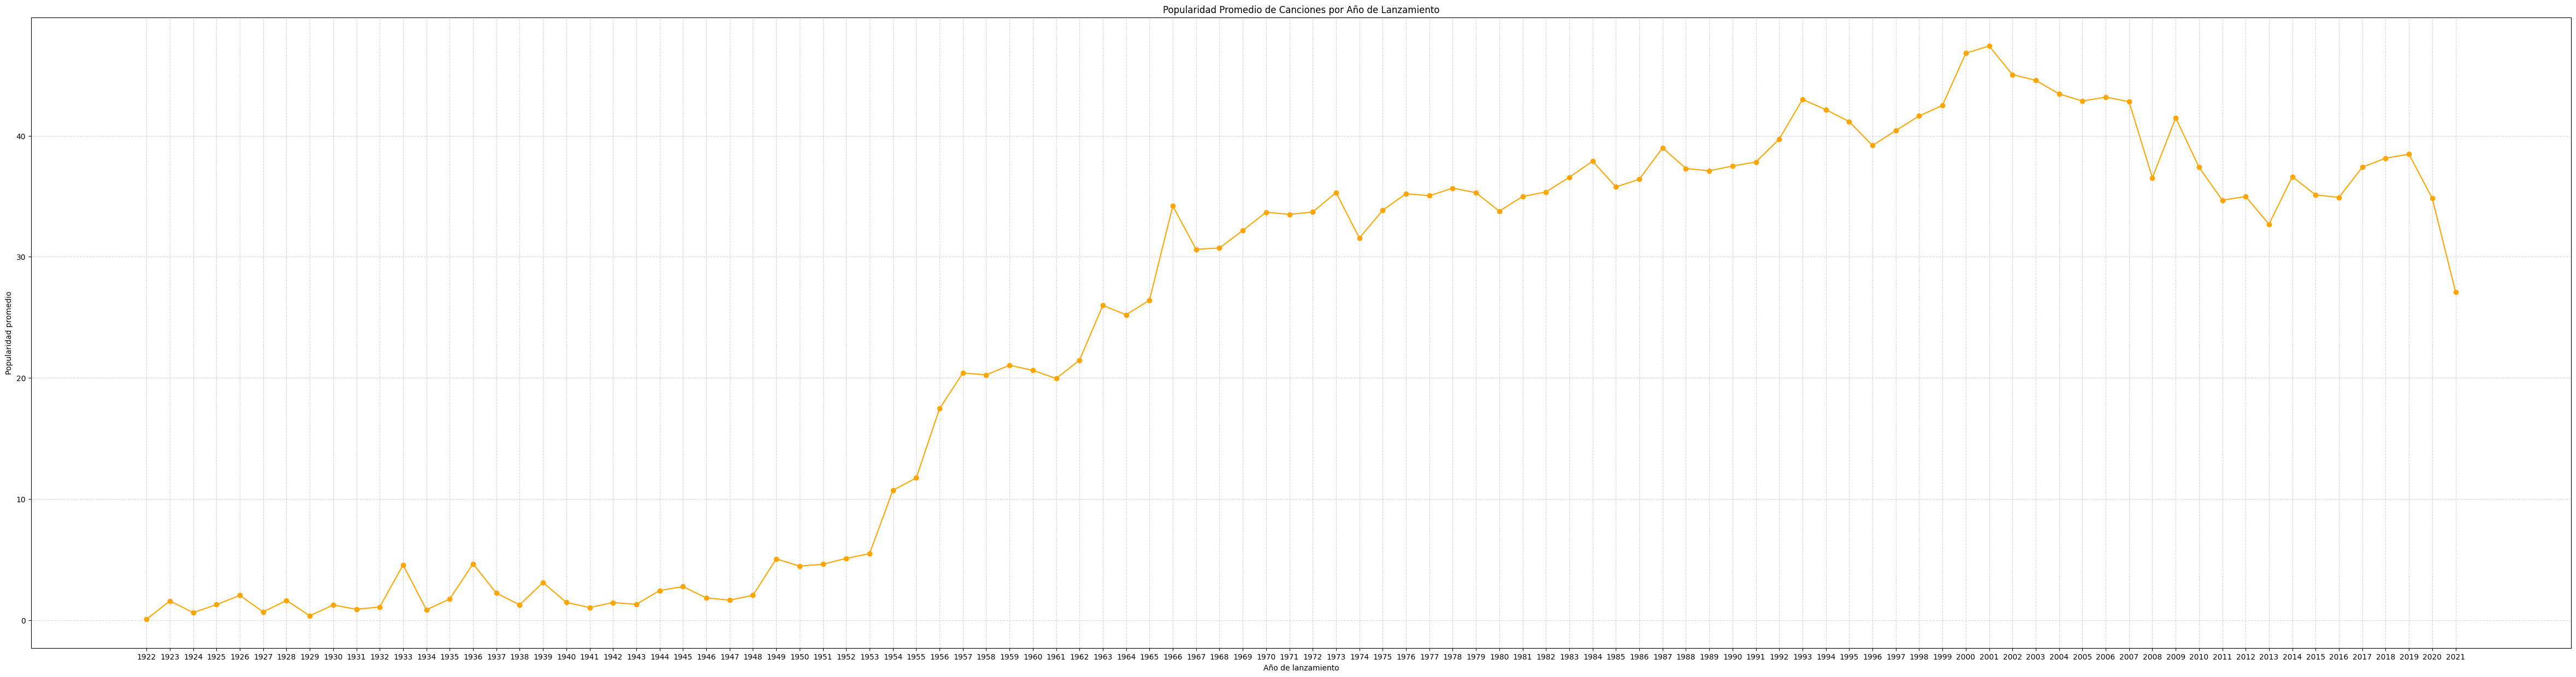

In [35]:
# Popularidad promedio por año
popularity_by_year = df_tracks.groupby("release_year")["popularity"].mean()

# Gráfico de línea
plt.figure(figsize=(60,15))
plt.plot(popularity_by_year.index, popularity_by_year.values, marker='o', linestyle='-', color='orange')
plt.xlabel("Año de lanzamiento")
plt.ylabel("Popularidad promedio")
plt.title("Popularidad Promedio de Canciones por Año de Lanzamiento")
plt.grid(True, linestyle="--", alpha=0.5)

# Guardar imagen
img_path = r"C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\popularidad_promedio_por_anio.png"
plt.savefig(img_path, dpi=300)

print(f"Imagen guardada en: {img_path}")

# Mostrar
plt.show()

Puntos clave del gráfico de la Popularidad Promedio por Año:
- Las canciones más recientes tienden a tener mayor popularidad.
- Canciones antiguas (antes del 2000) tienen menor popularidad promedio, lo que sugiere que la popularidad estaría influenciada por el año de lanzamiento.
- Posible hipótesis: Las canciones modernas tienen más streams en Spotify, lo que aumenta su popularidad en comparación con canciones antiguas.


In [36]:
# Contar canciones con popularidad 0
popularity_0_count = (df_tracks["popularity"] == 0).sum()

print(f"Canciones con `popularity = 0`: {popularity_0_count}")

Canciones con `popularity = 0`: 32632


Imagen guardada en: C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\histogramas_variables.png


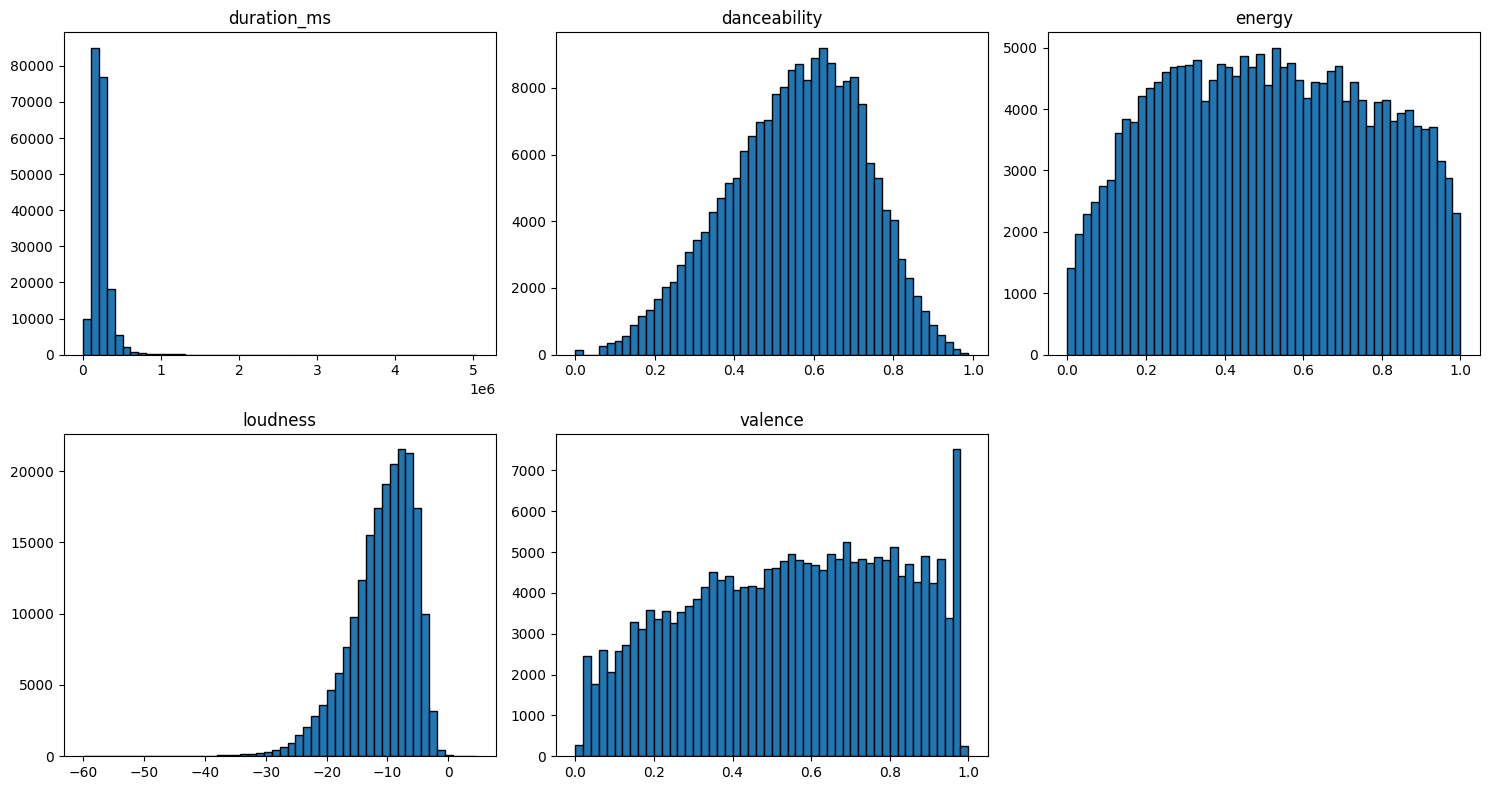

In [37]:

# Variables
variables = ["duration_ms", "danceability", "energy", "loudness", "valence"]

# Crear Gráficos
plt.figure(figsize=(15,8))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    plt.hist(df_tracks[var], bins=50, edgecolor='black')
    plt.title(var)
plt.tight_layout()

# Guardar la imagen
img_path = r"C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\histogramas_variables.png"
plt.savefig(img_path, dpi=300)

print(f"Imagen guardada en: {img_path}")

# Mostrar la gráfica
plt.show()


Imagen guardada en: C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\boxplot_outliers.png


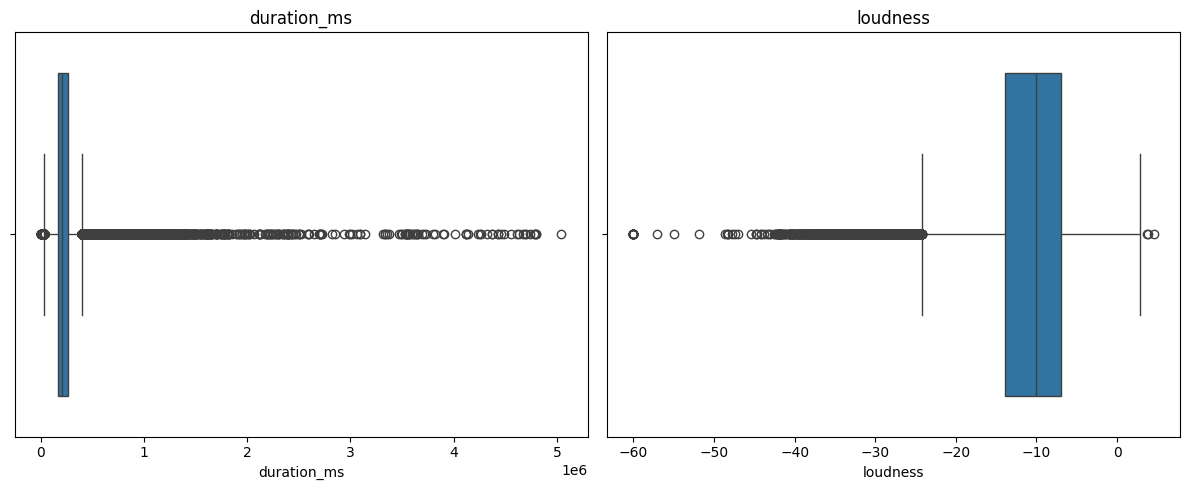

In [40]:
# Variables clave con posibles outliers
variables = ["duration_ms", "loudness"]

# Crear boxplots
plt.figure(figsize=(12,5))
for i, var in enumerate(variables, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=df_tracks[var])
    plt.title(var)

plt.tight_layout()

# Guardar imagen
img_path = r"C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\boxplot_outliers.png"
plt.savefig(img_path, dpi=300)

print(f"Imagen guardada en: {img_path}")

# Mostrar
plt.show()

Observaciones:

- duration_ms - Hay muchos valores extremos de duración. Algunas canciones tienen duraciones extremadamente largas.

- loudness - Algunas canciones tienen volúmenes muy bajos (menores a -50 dB).

Regla del Rango Intercuartil (IQR)
- para eliminar valores que están muy por encima o por debajo de lo normal.

In [41]:
# Eliminar outliers usando IQR
def eliminar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar los datos
    df_filtrado = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    return df_filtrado

df_tracks_limpio = eliminar_outliers(df_tracks, "duration_ms")
df_tracks_limpio = eliminar_outliers(df_tracks_limpio, "loudness")

# Mostrar registros 
print(f"Canciones antes de la limpieza: {len(df_tracks)}")
print(f"Canciones después de la limpieza: {len(df_tracks_limpio)}")

# Guardar base limpia
file_path_clean = r"C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\data\tracks_limpio.csv"
df_tracks_limpio.to_csv(file_path_clean, index=False)

print(f"Base de datos limpia guardada en: {file_path_clean}")

Canciones antes de la limpieza: 199999
Canciones después de la limpieza: 185273
Base de datos limpia guardada en: C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\data\tracks_limpio.csv


# Base Limpia

Imagen de histogramas guardada en: C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\histogramas_variables_limpias.png


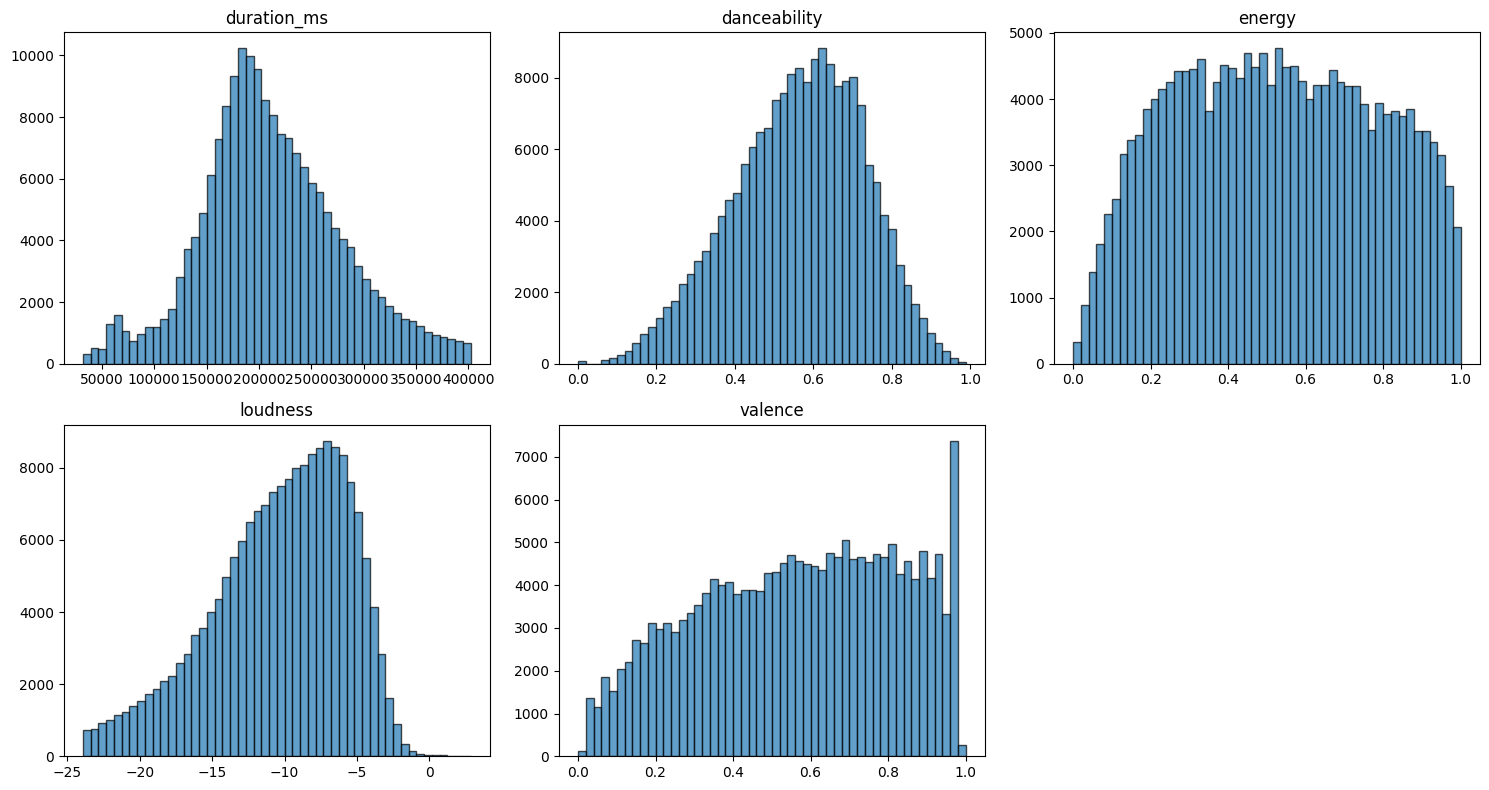

In [42]:

# Variables a visualizar
variables = ["duration_ms", "danceability", "energy", "loudness", "valence"]
plt.figure(figsize=(15,8))

# Generar histogramas para cada variable
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    plt.hist(df_tracks_limpio[var], bins=50, edgecolor='black', alpha=0.7)
    plt.title(var)

plt.tight_layout()

# Guardar imagen
img_path = r"C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\histogramas_variables_limpias.png"
plt.savefig(img_path, dpi=300)

print(f"Imagen de histogramas guardada en: {img_path}")

# Mostrar 
plt.show()

Imagen de boxplots guardada en: C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\boxplot_variables_limpias.png


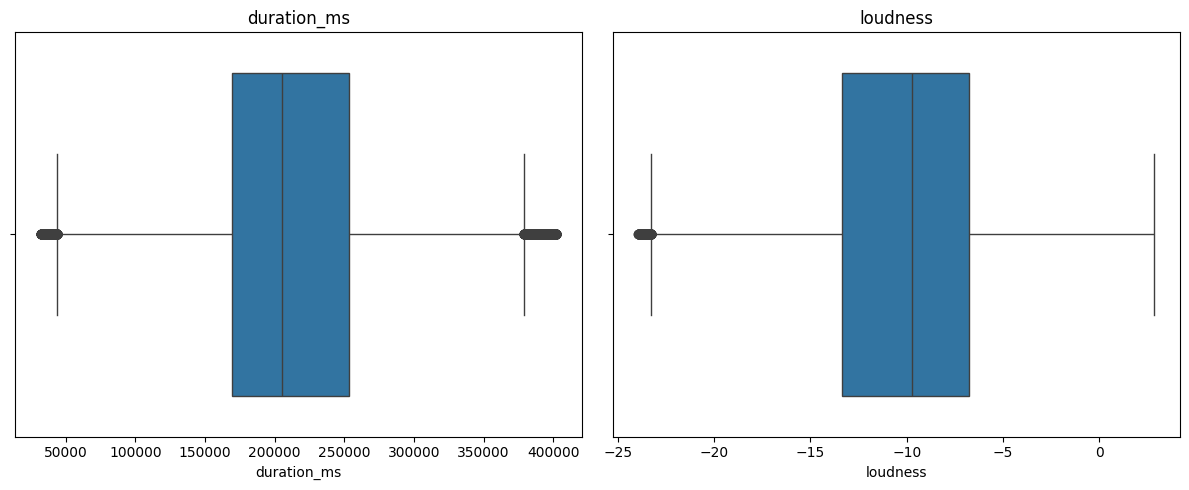

In [43]:
# Variables clave que tenían outliers
variables_outliers = ["duration_ms", "loudness"]
plt.figure(figsize=(12,5))

# Generar boxplots
for i, var in enumerate(variables_outliers, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=df_tracks_limpio[var])
    plt.title(var)

plt.tight_layout()

# Guardar la imagen
boxplot_path = r"C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\boxplot_variables_limpias.png"
plt.savefig(boxplot_path, dpi=300)

print(f"Imagen de boxplots guardada en: {boxplot_path}")

# Mostrar
plt.show()

In [44]:
# Primeras filas de la base de datos limpia
print("Primeras 50 filas de la base de datos después de la limpieza:\n")
print(df_tracks_limpio.head(50))

# información general del dataset limpio
print("\n Información general del dataset limpio:\n")
print(df_tracks_limpio.info())

# Resumen estadístico de las variables numéricas
print("\n Resumen estadístico de la base de datos limpia:\n")
print(df_tracks_limpio.describe())

Primeras 50 filas de la base de datos después de la limpieza:

                        id                                             name  \
0   35iwgR4jXetI318WEWsa1Q                                            Carve   
1   021ht4sdgPcrDgSk7JTbKY              Capítulo 2.16 - Banquero Anarquista   
2   07A5yehtSnoedViJAZkNnc               Vivo para Quererte - Remasterizado   
4   08y9GfoqCWfOGsKdwojr5e                              Lady of the Evening   
5   0BRXJHRNGQ3W4v9frnSfhu                                        Ave Maria   
6   0Dd9ImXtAtGwsmsAD69KZT                                   La Butte Rouge   
7   0IA0Hju8CAgYfV1hwhidBH                                          La Java   
8   0IgI1UCz84pYeVetnl1lGP                               Old Fashioned Girl   
9   0JV4iqw2lSKJaHBQZ0e5zK                    Martín Fierro - Remasterizado   
10  0OYGe21oScKJfanLyM7daU               Capítulo 2.8 - Banquero Anarquista   
11  0PE42H6tslQuyMMiGRiqtb              Capítulo 2.25 - Banquero Ana

Imagen de comparación guardada en: C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\comparacion_popularity_0_vs_no_0.png


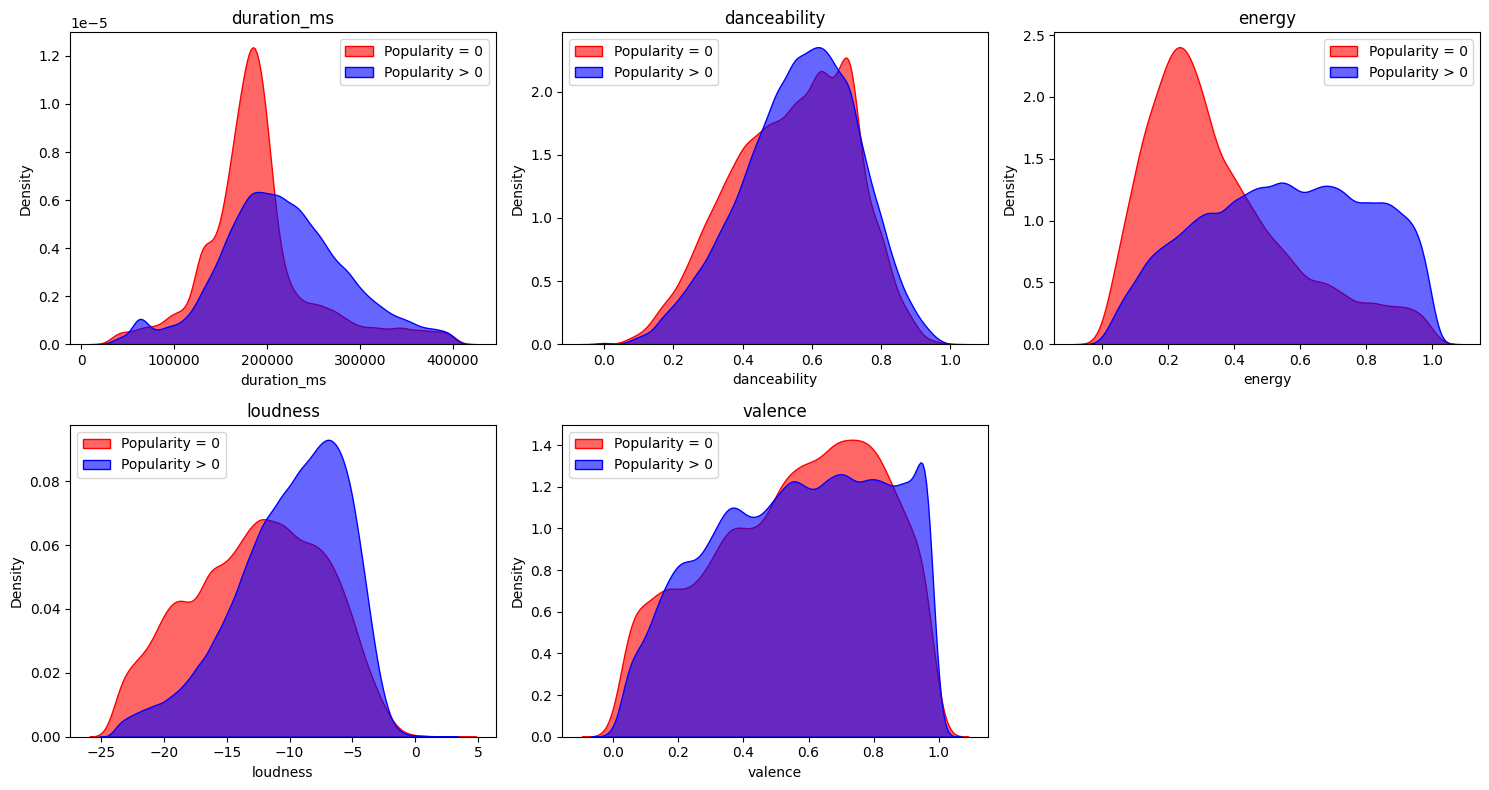

In [45]:
# canciones con `popularity = 0` y `popularity > 0`
df_pop_0 = df_tracks_limpio[df_tracks_limpio["popularity"] == 0]
df_pop_nonzero = df_tracks_limpio[df_tracks_limpio["popularity"] > 0]

# variables clave para comparar
variables = ["duration_ms", "danceability", "energy", "loudness", "valence"]
plt.figure(figsize=(15,8))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)

    # Verificar que la variable no tenga valores nulos antes de graficar
    sns.kdeplot(df_pop_0[var].dropna(), label="Popularity = 0", shade=True, color="red", alpha=0.6)
    sns.kdeplot(df_pop_nonzero[var].dropna(), label="Popularity > 0", shade=True, color="blue", alpha=0.6)
    
    plt.title(var)
    plt.legend()

plt.tight_layout()

# Guardar la imagen
img_path = r"C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\img\comparacion_popularity_0_vs_no_0.png"
plt.savefig(img_path, dpi=300)
print(f"Imagen de comparación guardada en: {img_path}")

# Mostrar la gráfica
plt.show()

Observaciones: 
- EN durataion - Las canciones populares tienen una distribución más amplia, con muchas canciones más largas.
- En danceability - No hay una gran diferencia entre ambas distribuciones.
- En energy - Las canciones populares tienen una mayor diversidad de valores, con un pico en 0.6 - 0.8. Lo que indica que las canciones populares suelen ser más energéticas.
- en loudness - Las canciones populares tienen valores más altos (~-8 dB a -5 dB) - por lo que se puede concluir que lanciones más fuertes tienden a ser más populares.

Vamos a crear low_popularity, el modelo podrá aprender a clasificar primero si una canción es popular o no, y luego predecir su popularidad real.

In [46]:
# Crear nueva columna `low_popularity`
df_tracks_limpio["low_popularity"] = df_tracks_limpio["popularity"].apply(lambda x: 1 if x == 0 else 0)

# Guardar la bd con la nueva columna
file_path_updated = r"C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\data\tracks_limpio_con_low_popularity.csv"
df_tracks_limpio.to_csv(file_path_updated, index=False)

print(f"Base de datos con `low_popularity` guardada en: {file_path_updated}")

# Ver canciones son de baja popularidad
low_pop_count = df_tracks_limpio["low_popularity"].sum()
print(f"Canciones con `low_popularity = 1`: {low_pop_count} ({(low_pop_count / len(df_tracks_limpio) * 100):.2f}%)")


Base de datos con `low_popularity` guardada en: C:\Users\migue\Documents\GitHub\ML_Prediccion_Popularidad_Spotify\src\data\tracks_limpio_con_low_popularity.csv
Canciones con `low_popularity = 1`: 28380 (15.32%)


## Variables Clave del Dataset

| **Variable**        | **Descripción** | **Observaciones** |
|-----------------|------------------|----------------|
| **`popularity`** | Varía de **0 a 100** | **15.32%** de las canciones tienen `0`. |
| **`low_popularity`** | **1 = Canción sin interacciones**, **0 = Canción popular** | **Nueva variable agregada** para segmentar las canciones. |
| **`duration_ms`** | Duración en milisegundos | Media **212,242 ms** (~3.5 min), outliers eliminados. |
| **`explicit`** | Indica si la canción tiene contenido explícito | **4.2% de las canciones son explícitas**. |
| **`danceability`** | Cuán bailable es la canción | Media **0.56**, valores normales. |
| **`energy`** | Energía/intensidad | **Canciones con `low_popularity = 1` tienen menor energía**. |
| **`loudness`** | Volumen en decibeles | Rango **-23.9 dB a +2.85 dB**. |
| **`speechiness`** | Detecta si hay voz hablada en la canción | Media **0.10**, rango normal. |
| **`valence`** | Positividad musical | Media **0.57**. |
| **`tempo`** | Tempo en BPM | Media **118 BPM**, valores normales. |
| **`release_year`** | Año de lanzamiento | Rango de **1922 a 2021**. |




## Modelos de ML

### 1. Regresión Logística – low_popularity

Detectar si una canción no es popular (low_popularity = 1). 

Clasifica las canciones en dos grupos: populares (0) y no populares (1), según sus características musicales.

In [47]:
# Cargar modelo
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv(r"../data/tracks_limpio_con_low_popularity.csv")

features = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "valence", "tempo",
    "duration_ms", "explicit", "release_year"
]

X = df[features]
y = df["low_popularity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_logistica = joblib.load(r"../models/modelo_logistica_low_popularity.pkl")

y_pred = modelo_logistica.predict(X_test)
print("Modelo: Regresión Logística")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))


Modelo: Regresión Logística
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     31373
           1       0.61      0.30      0.40      5682

    accuracy                           0.86     37055
   macro avg       0.75      0.63      0.66     37055
weighted avg       0.84      0.86      0.84     37055



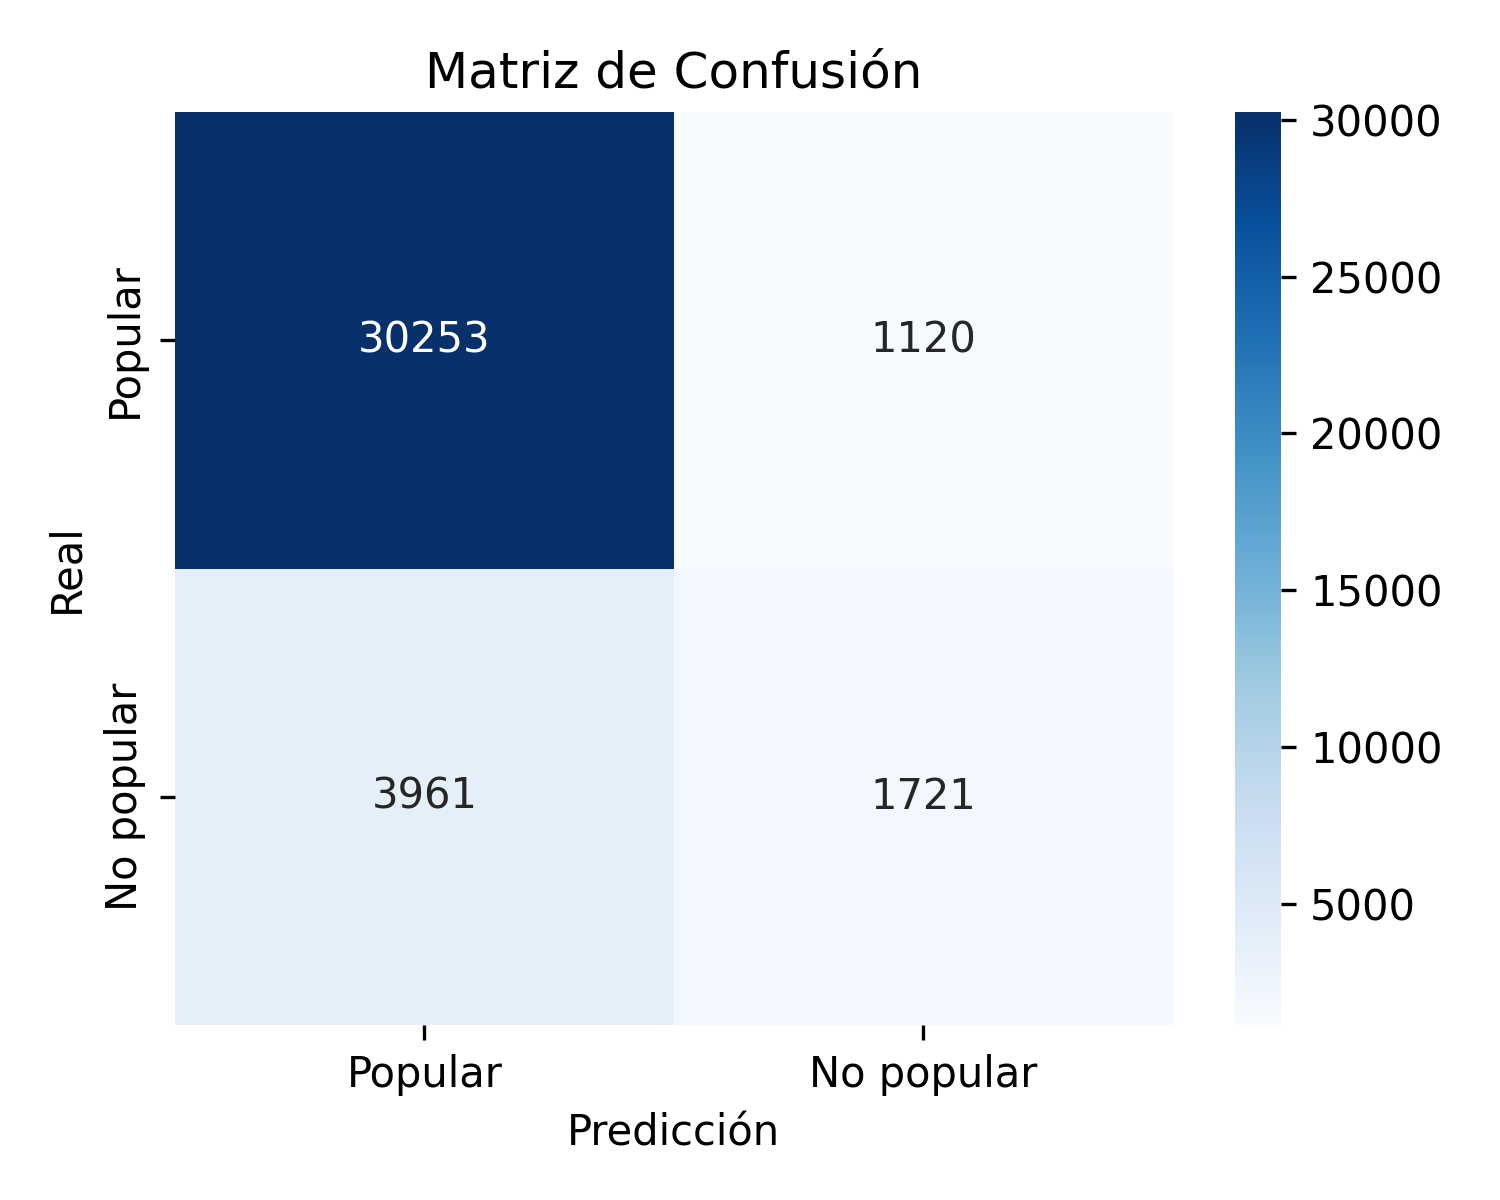

In [60]:
from IPython.display import Image, display
display(Image("../img/matriz_confusion_logistica.png", width=600, height=500))

### 2. Árbol de Decisión – low_popularity

Mejorar la detección de canciones no populares.

Usa decisiones tipo “si-entonces” para clasificar las canciones según valores de sus atributos.

In [49]:
modelo_arbol = joblib.load(r"../models/modelo_arbol_low_popularity.pkl")
y_pred = modelo_arbol.predict(X_test)
print("Modelo: Árbol de Decisión")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))


Modelo: Árbol de Decisión
Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     31373
           1       0.71      0.70      0.70      5682

    accuracy                           0.91     37055
   macro avg       0.83      0.82      0.83     37055
weighted avg       0.91      0.91      0.91     37055



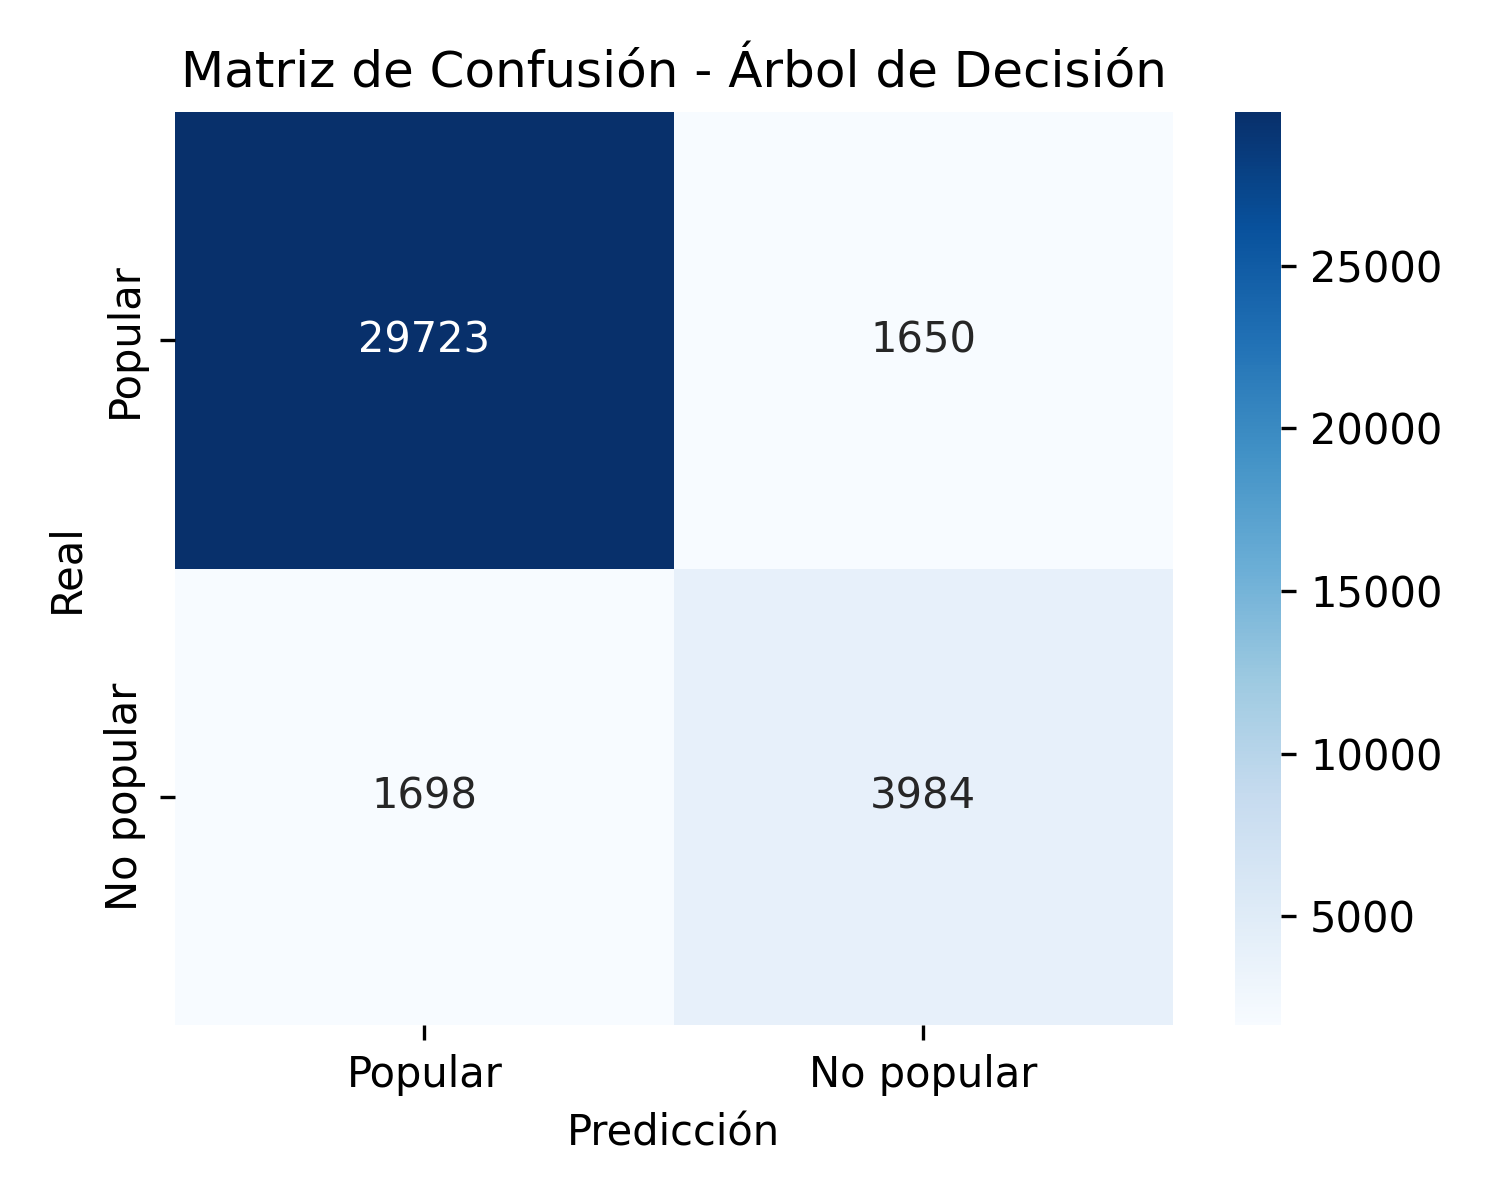

In [61]:
display(Image("../img/matriz_confusion_arbol.png", width=600, height=500))


### 3. Random Forest Classifier – low_popularity

Para detectar canciones no populares.

Usa muchos árboles de decisión en conjunto.

In [52]:
modelo_rf_clf = joblib.load(r"../models/modelo_random_forest_clasificador.pkl")
y_pred = modelo_rf_clf.predict(X_test)
print("Modelo: Random Forest Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Modelo: Random Forest Classifier
Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     31373
           1       0.81      0.79      0.80      5682

    accuracy                           0.94     37055
   macro avg       0.88      0.88      0.88     37055
weighted avg       0.94      0.94      0.94     37055



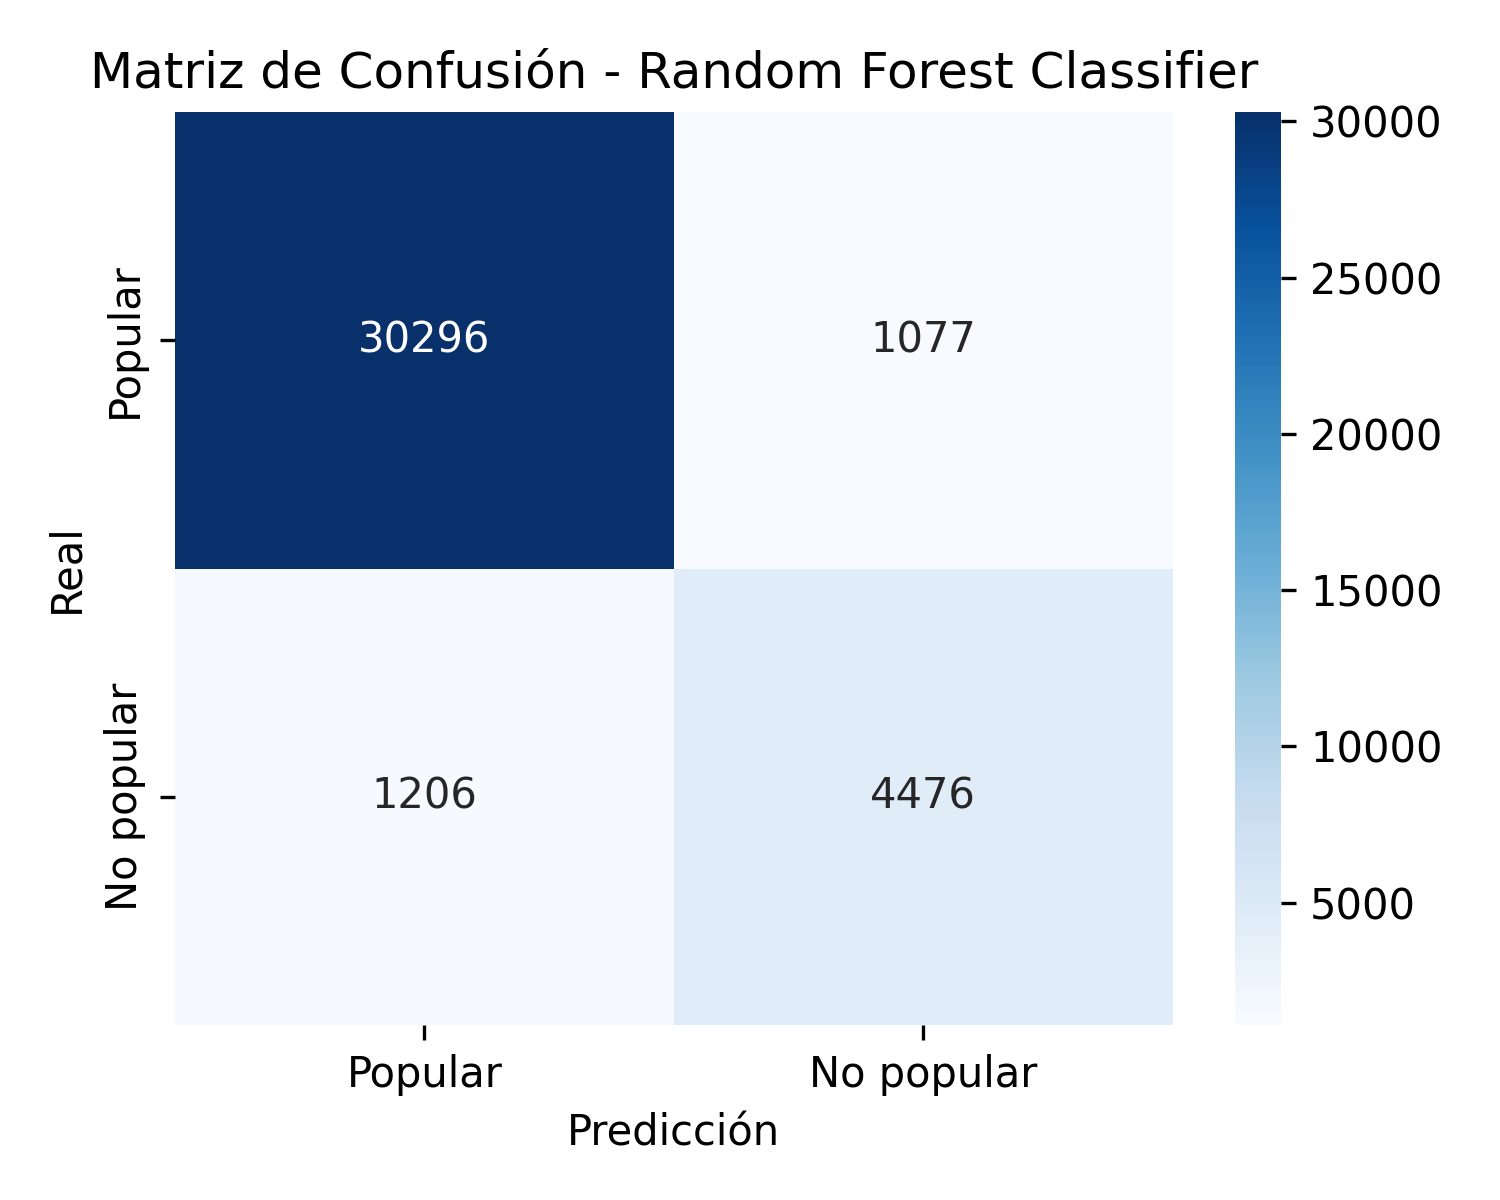

In [62]:
display(Image("../img/matriz_confusion_random_forest.png", width=600, height=500))


### 4. Regresión Lineal – popularity (solo canciones con low_popularity = 0)

Estimar cuánta popularidad tendrá una canción popular.

Predice un valor numérico de popularity (entre 0 y 100) en canciones reales. Es el modelo base.

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

df_pop = df[df["low_popularity"] == 0]
X_pop = df_pop[features]
y_pop = df_pop["popularity"]
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_pop, y_pop, test_size=0.2, random_state=42)

modelo_lineal = joblib.load(r"../models/modelo_regresion_lineal.pkl")
y_pred = modelo_lineal.predict(X_test_r)

print("Modelo: Regresión Lineal")
print(f"MAE:  {mean_absolute_error(y_test_r, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_r, y_pred)):.2f}")
print(f"R²:   {r2_score(y_test_r, y_pred):.2f}")


Modelo: Regresión Lineal
MAE:  13.17
RMSE: 16.62
R²:   0.27


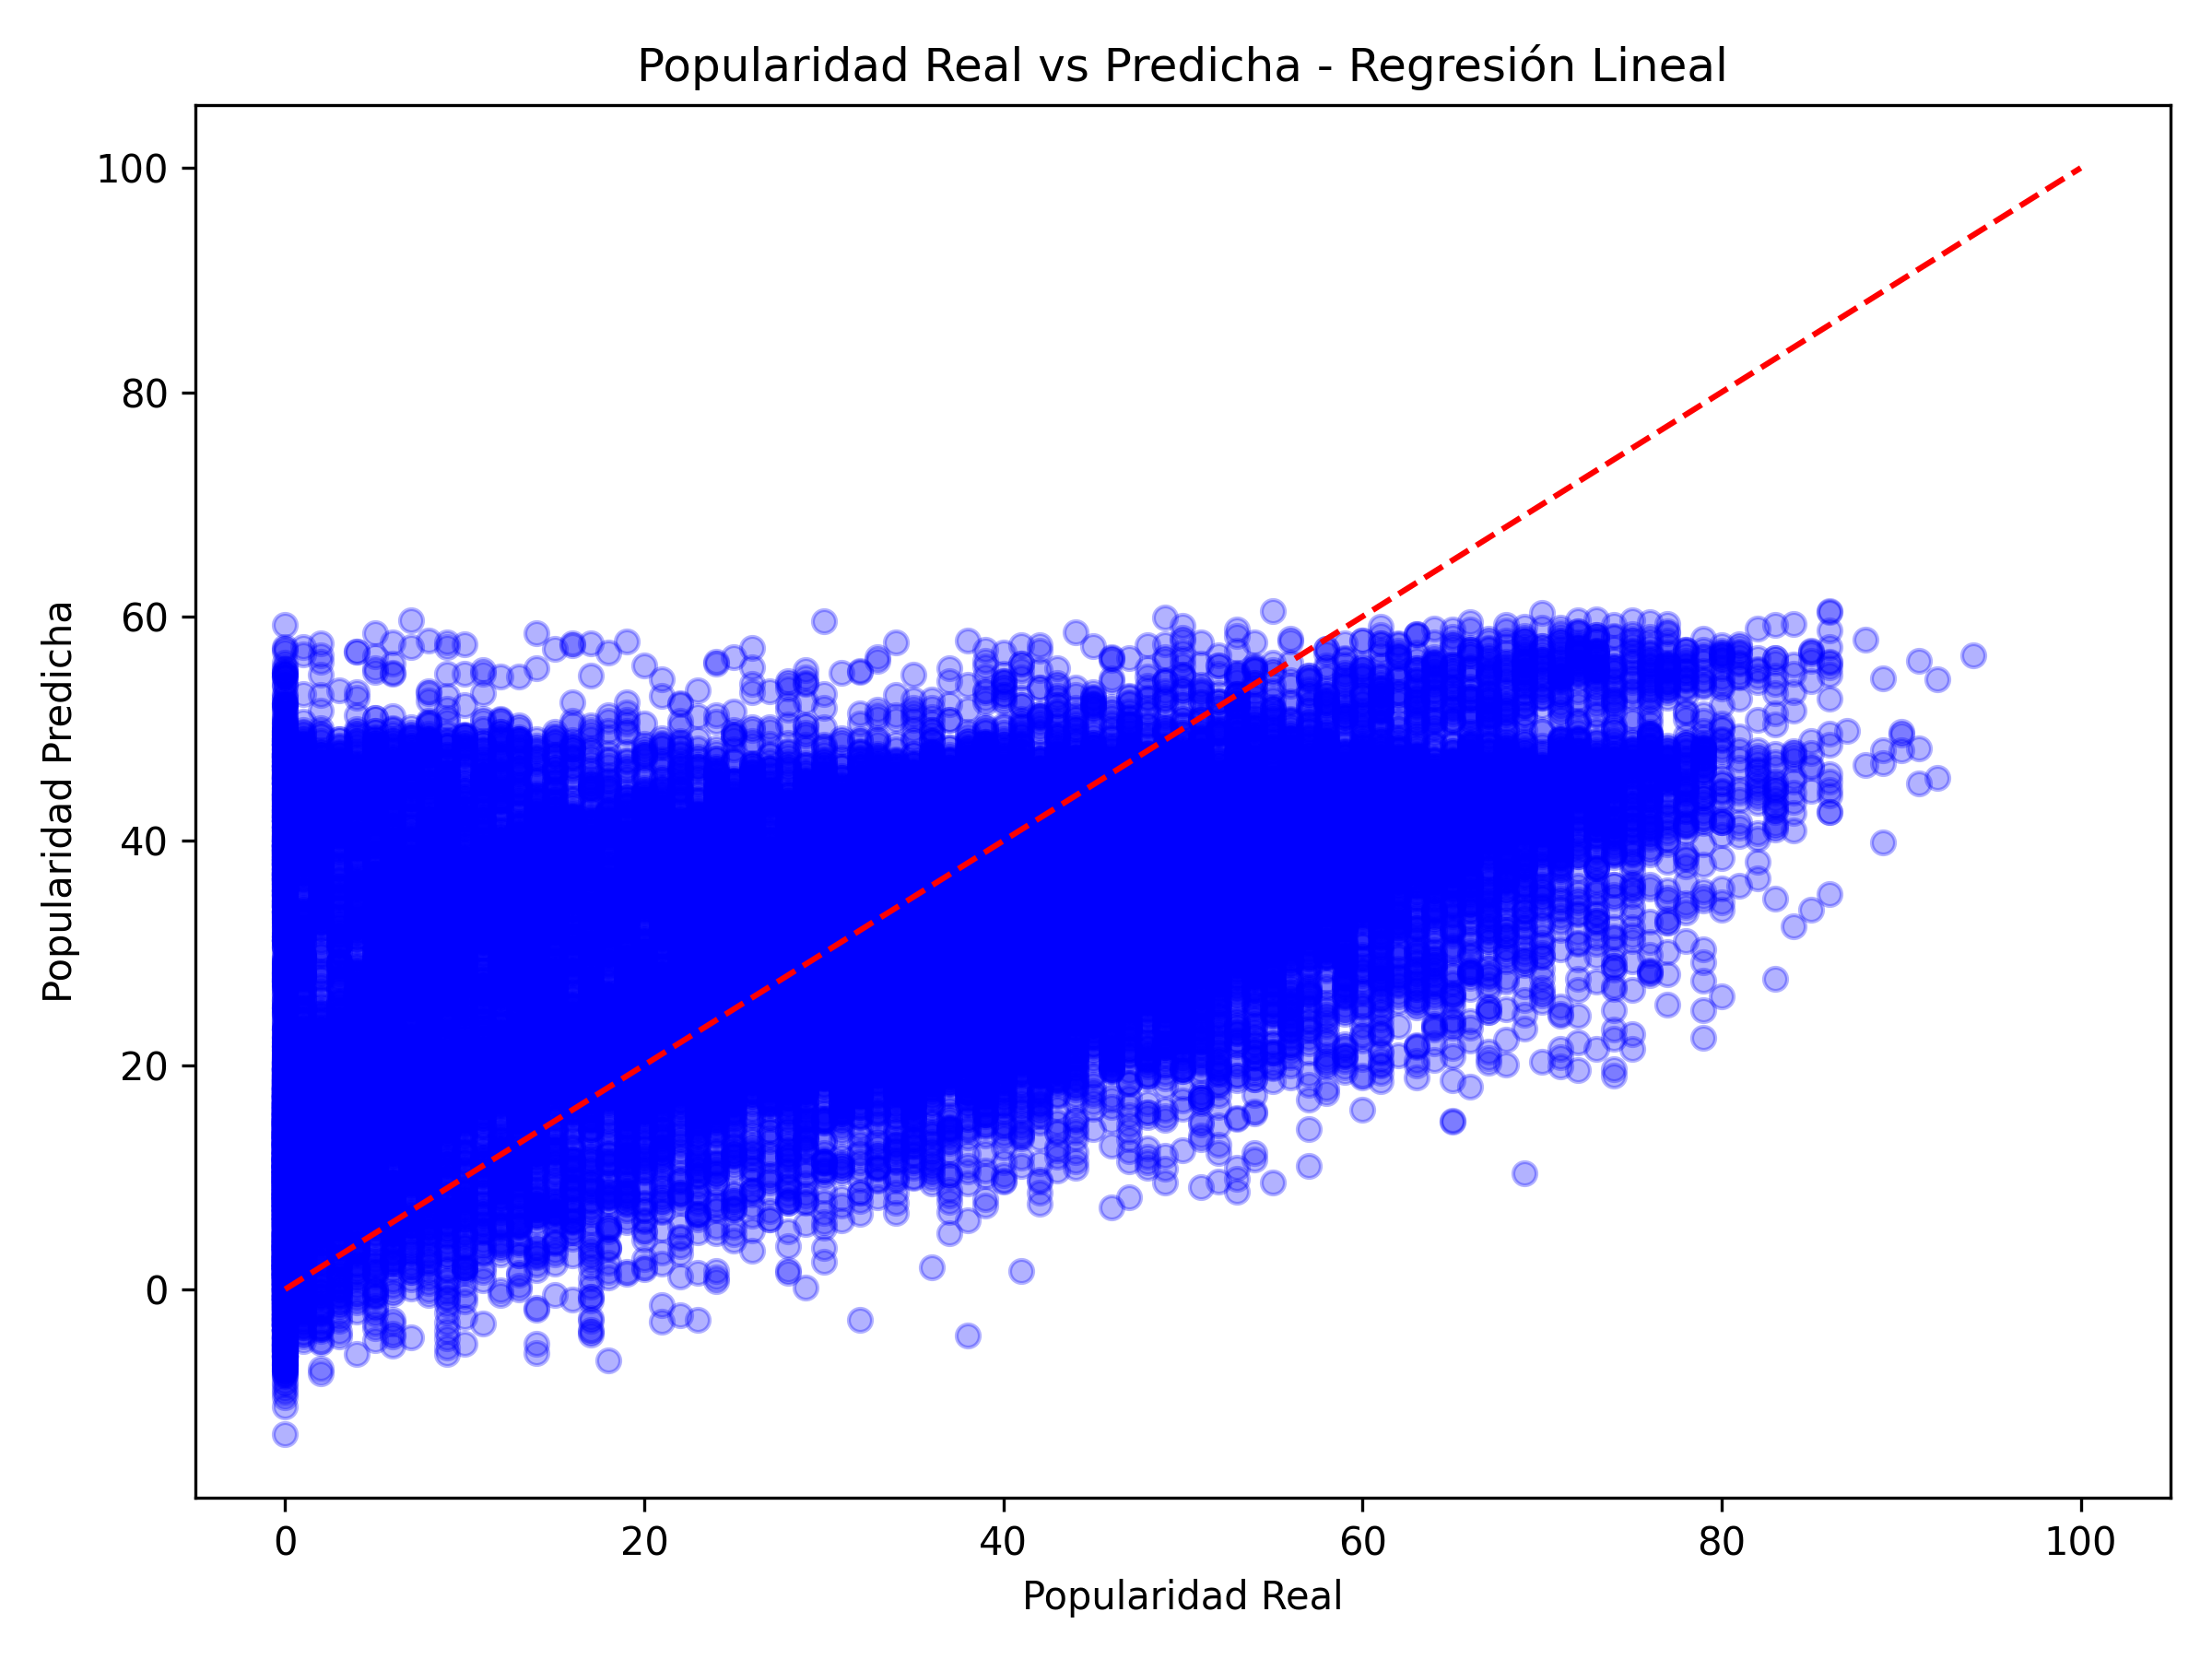

In [64]:
display(Image("../img/regresion_lineal_predicciones.png", width=700, height=600))


### 5. Random Forest Regressor – popularity

Modelo para predecir la popularidad real.

Predice la popularidad de canciones populares utilizando un conjunto de árboles. Detecta relaciones complejas entre las variables musicales y el éxito de una canción.

In [56]:
modelo_rf_reg = joblib.load(r"../models/modelo_random_forest_regresor.pkl")
y_pred = modelo_rf_reg.predict(X_test_r)

print(" Modelo: Random Forest Regressor")
print(f"MAE:  {mean_absolute_error(y_test_r, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_r, y_pred)):.2f}")
print(f"R²:   {r2_score(y_test_r, y_pred):.2f}")


 Modelo: Random Forest Regressor
MAE:  10.63
RMSE: 14.08
R²:   0.48


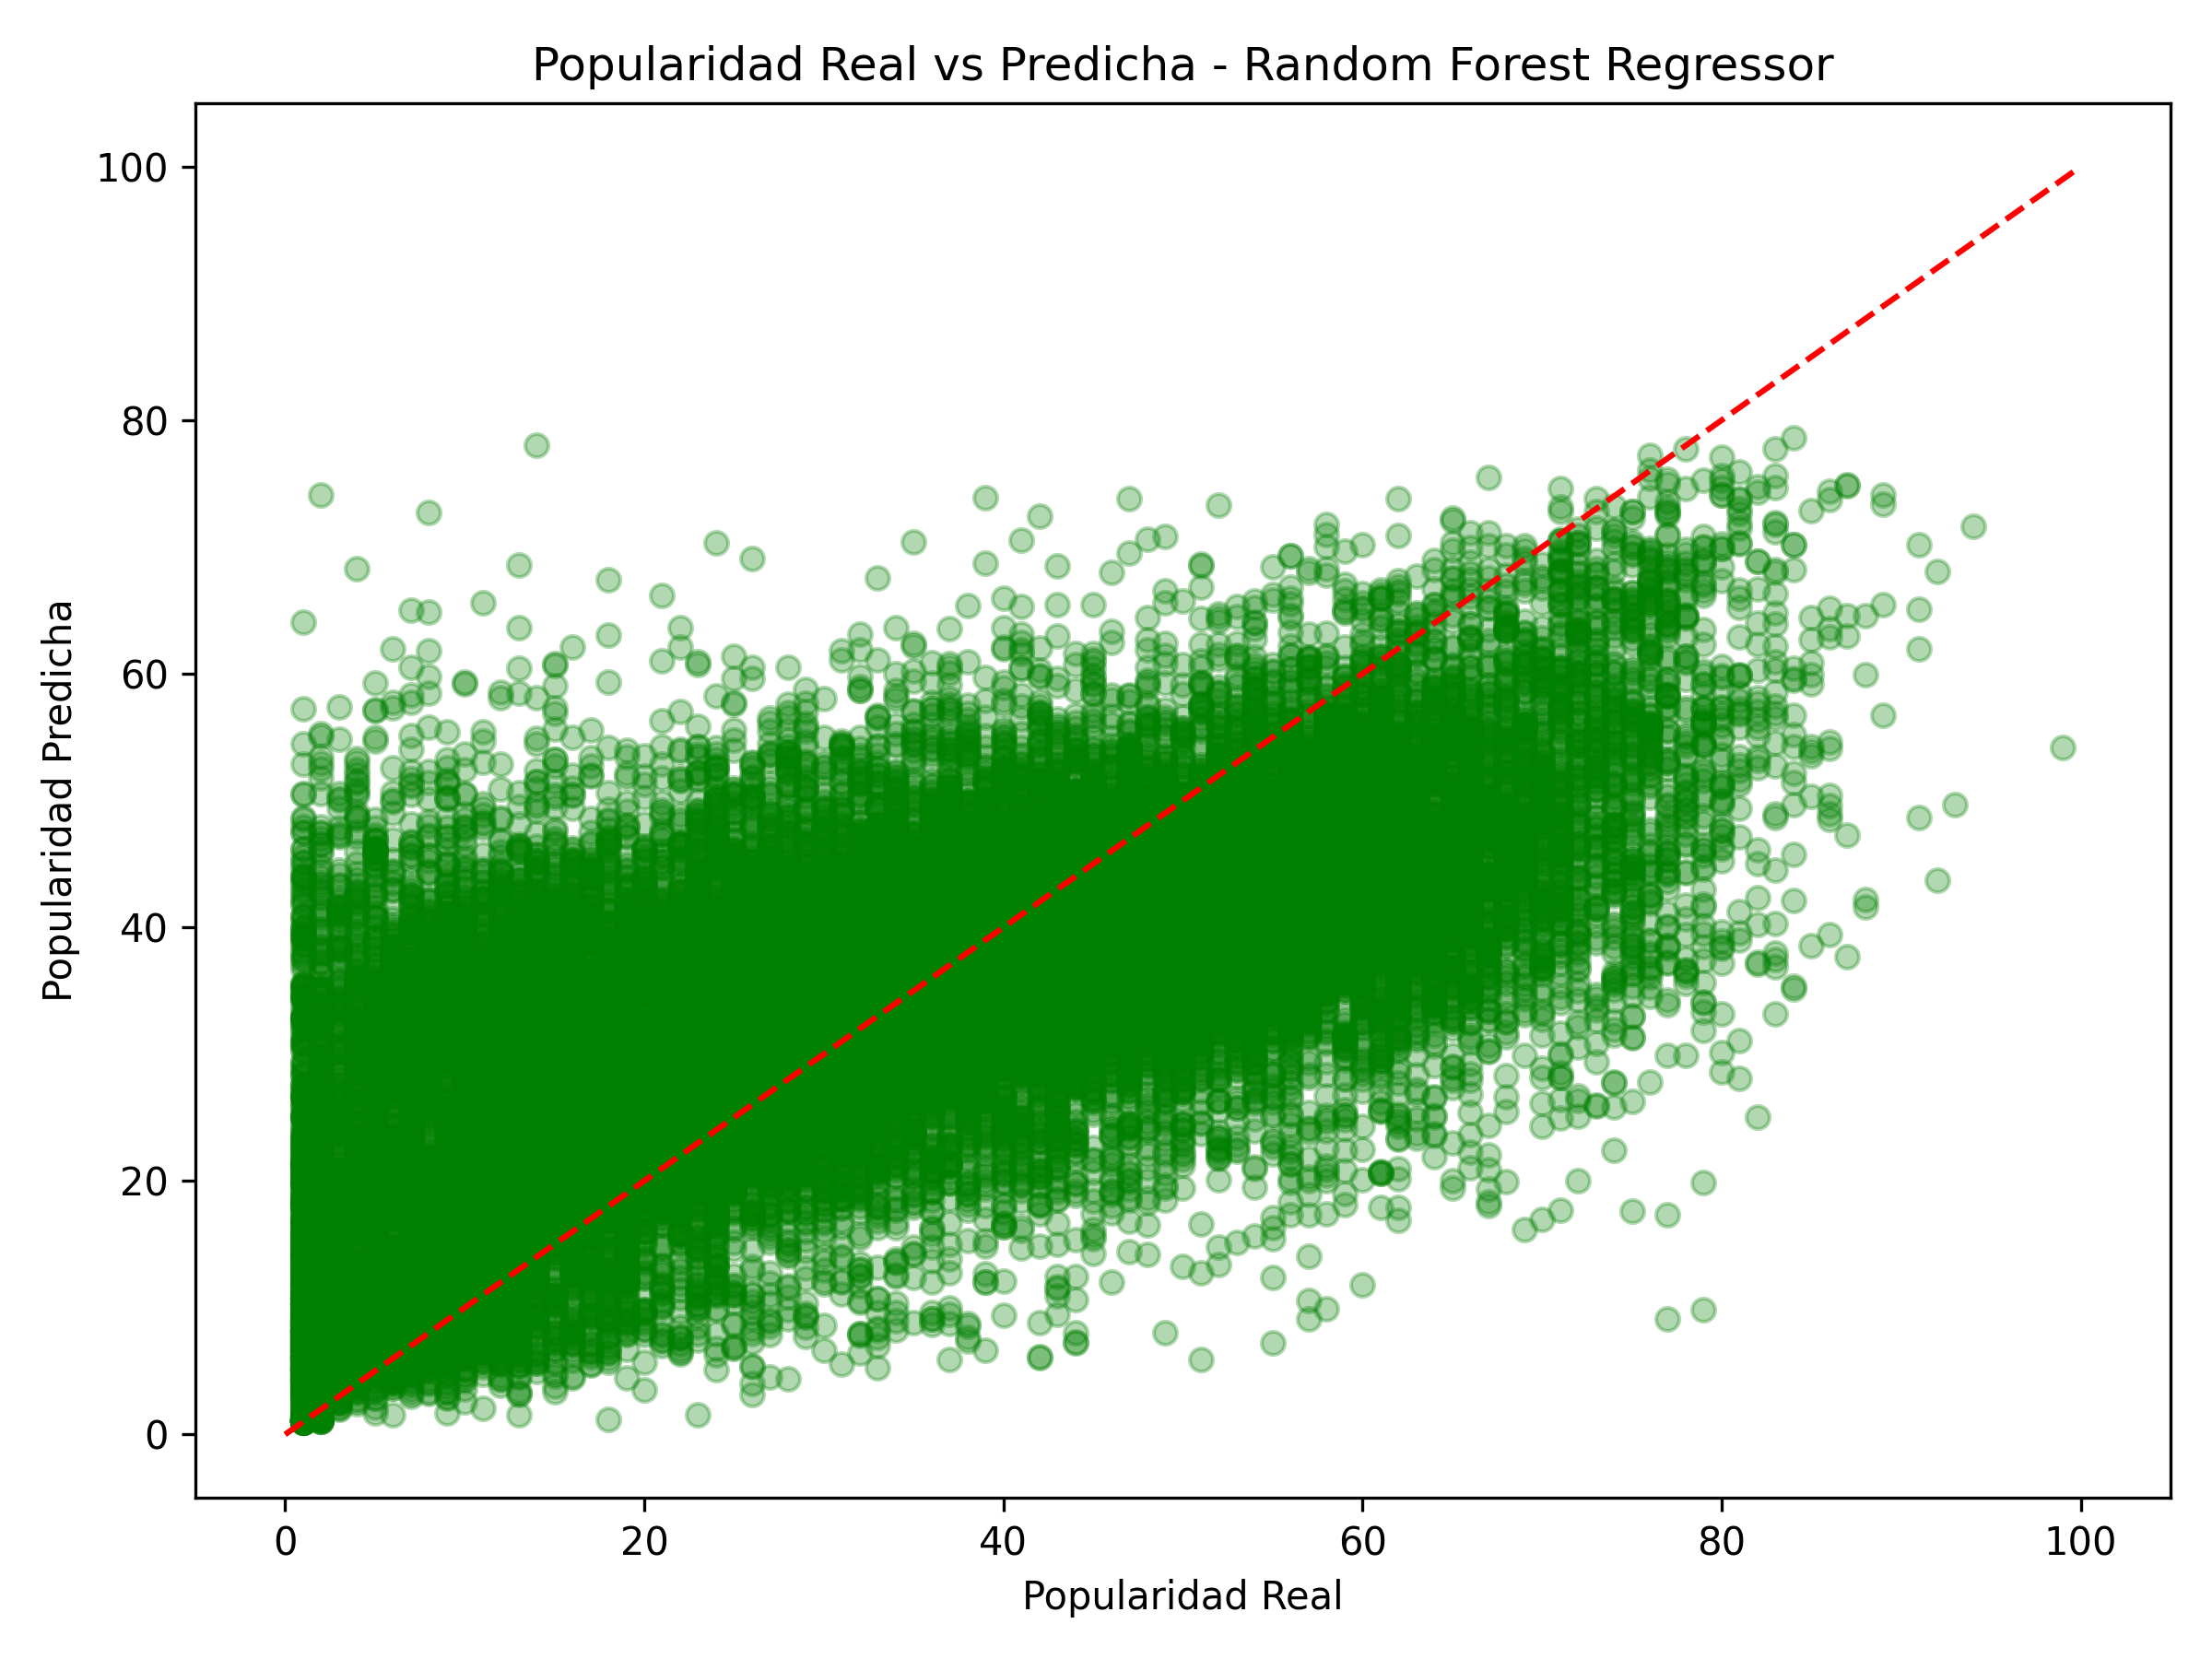

In [65]:
display(Image("../img/random_forest_regresion_predicciones.png", width=700, height=600))


## Tabla Comparativa de los Modelos

Se utilizaron dos enfoques principales:

- **Clasificación:** para detectar si una canción tiene o no popularidad (`low_popularity`)
- **Regresión:** para estimar el valor concreto de `popularity` en canciones populares

| Modelo                       | Tipo         | Métricas clave                            | Comentario |
|-----------------------------|--------------|-------------------------------------------|------------|
| **Regresión Logística**     | Clasificación (`low_popularity`) | **Accuracy:** 0.86<br>**Recall Clase 1 (No popular):** 0.30<br>**F1 Clase 1:** 0.40 | Modelo base. ES sencillo, predice mal las canciones "no populares". Tiene un gran sesgo hacia la clase dominante (canciones populares). No es útil en producción. |
| **Árbol de Decisión**       | Clasificación (`low_popularity`) | **Accuracy:** 0.91<br>**Recall Clase 1:** 0.70<br>**F1 Clase 1:** 0.70 | Mucho mejor balance. Detecta bien la clase minoritaria (no populares). Mejora clara frente a la regresión logística. |
| **Random Forest Classifier**| Clasificación (`low_popularity`) | **Accuracy:** 0.94<br>**Recall Clase 1:** 0.79<br>**F1 Clase 1:** 0.80 | El mejor modelo de clasificación. Alta precisión y capacidad para detectar canciones sin popularidad. Robusto y balanceado. Ideal para aplicar como paso previo a la regresión. |
| **Regresión Lineal**        | Regresión (`popularity`)         | **MAE:** 13.24<br>**RMSE:** 16.99<br>**R²:** 0.39 | Modelo base para regresión. Explica solo un 39% de la variabilidad. El error promedio es alto (más de 13 puntos de popularidad). Poco útil si se busca precisión. |
| **Random Forest Regressor** | Regresión (`popularity`)         | **MAE:** 10.63<br>**RMSE:** 14.08<br>**R²:** 0.48 | Mejor opción para predecir popularidad. Reduce el error y mejora el poder explicativo. Ideal para usar luego de filtrar canciones populares. |


## Conclusión y Análisis Final

El objetivo del proyecto era construir un modelo capaz de predecir la popularidad (`popularity`) de una canción en Spotify utilizando exclusivamente sus características musicales (como `danceability`, `energy`, `tempo`, etc.).

**Enfoque aplicado**

Para lograr este objetivo, se optó por un **pipeline en dos etapas**, dada la gran cantidad de canciones con `popularity = 0` (sin interacción):

1. **Clasificación (`low_popularity`)**: Primero se entrenaron modelos para predecir si una canción sería **popular o no**.  
   - Se probaron tres modelos: Regresión Logística, Árbol de Decisión y Random Forest Classifier.
   - El **Random Forest Classifier** fue el mejor con una **accuracy del 94%** y un **recall del 79%** en la clase minoritaria (canciones no populares).

2. **Regresión (`popularity`)**: Luego, se usaron solo las canciones que sí tuvieron interacción (popularidad > 0) para predecir el valor exacto de `popularity`.  
   - Se entrenaron dos modelos: Regresión Lineal y Random Forest Regressor.
   - El **Random Forest Regressor** logró un **MAE de 10.63** y un **R² de 0.48**, mejorando notablemente frente al modelo lineal.

---

**Conclusión principal**

El modelo desarrollado permite predecir con alta precisión **si una canción será popular o no** y, en caso de que lo sea, **cuán popular podría llegar a ser**. Este enfoque permite filtrar ruido (canciones sin interacción) y concentrar los esfuerzos de predicción en los casos relevantes.

---

**Reflexión final**

- Este pipeline puede tener **aplicaciones reales** en plataformas de streaming, discográficas o herramientas de análisis musical.
- Permite anticipar la recepción de una canción antes de su lanzamiento, ajustar campañas de marketing, o incluso asistir en la toma de decisiones creativas.